In [14]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_name = "./images/prob5.jpg"
image = plt.imread(image_name)
print(image.shape)

(768, 1024, 3)


In [31]:
def img_svd(img, k):
    # Separating out the three colors
    red, green, blue = img[:,:,0], img[:,:,1], img[:,:,2]
    
    # Calculating the svd for each color
    U_red, S_red, V_red = svd(red, full_matrices=False)
    U_green, S_green, V_green = svd(green, full_matrices=False)
    U_blue, S_blue, V_blue = svd(blue, full_matrices=False)
    
    # Selecting only the top k features
    final_red = U_red[:,:k] @ ( np.diag(S_red[:k]) @ V_red[:k,:] )
    final_green = U_green[:,:k] @ ( np.diag(S_green[:k]) @ V_green[:k,:] )
    final_blue = U_blue[:,:k] @ ( np.diag(S_blue[:k]) @ V_blue[:k,:] )
    
    # Final Image
    fimg = np.zeros(img.shape)
    
    # Adding matrix for R, G & B in created array
    fimg[:,:,0], fimg[:,:,1], fimg[:,:,2] = final_red, final_green, final_blue
    
    # Adjusting values to the range 0-255
    for i in range(len(fimg)):
        for j in range(len(fimg[i])):
            for w in range(len(fimg[i][j])):
                fimg[i,j,w] = min(255, abs(fimg[i,j,w]))

    # Needed to convert to image object
    fimg = fimg.astype(np.uint8)
    
    # Saving into a image
    plt.imsave("./images/prob5_k="+str(k)+".jpg", fimg)
    return fimg

In [ ]:
def plot(l, ks):
    fig, ax = plt.subplots(1,len(l))
    names = ["K = "+str(i) for i in ks]+["Original Image"]
    for i in range(len(l)):
        
    plt.title("K = " + str(k) + "\n")
    plt.imshow(fimg)
    plt.axis('off')
    plt.show()

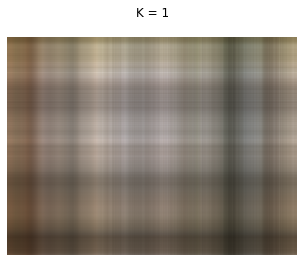

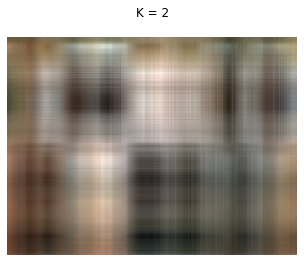

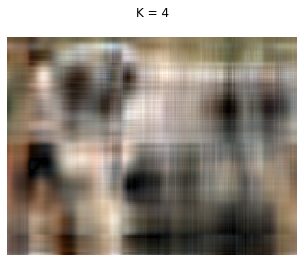

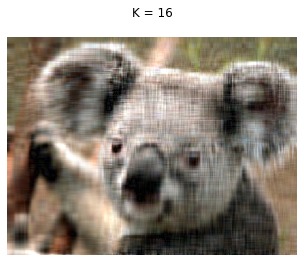

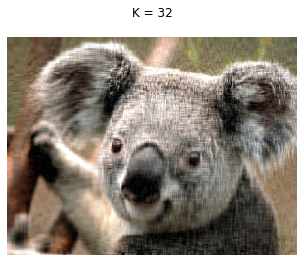

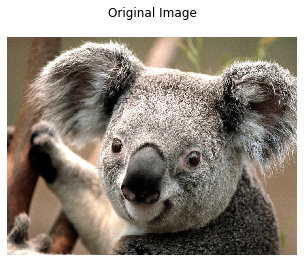

In [33]:
ks = [1,2,4,16,32]
outs = []
for k in ks:
    outs.append(img_svd(image, k))
plt.title("Original Image\n")
plt.imshow(image)
plt.axis('off')
plt.show()